## An Integrative and Modular Framework to Recapitulate Emergent Behavior in Cell Migration

Authors: Marina B. Cuenca, Lucia Canedo, Carolina Perez-Castro, Hernán E. Grecco

Frontiers on Cell and Developmental Biology DOI: 10.3389/fcell.2020.615759 //

Correspondence: cuencam@df.uba.ar, hgrecco@df.uba.ar


In [1]:
import matplotlib.pyplot as plt
from ipywidgets import interactive
from ipywidgets import widgets as widgets
from pathlib import Path as path
import os
from sqlat import * #check in file sqlat.py you have installed all the libraries

## Define working directory and filenames

In [7]:
dir_sim = path('/Users/cuenca/Documents/BsAs/SquaredLattice/NewSim/RangeCF') #Path where the controls will be saved. In Windows use r''

dir_sim.mkdir(exist_ok = True) #Folder is created if it does not exist

name = 'Var' #Prefix of files

## Constant parameters

In [3]:
# User Defined parameters
#Dynamics
tunit = 24 #value oof time unit in hours
dt = 0.0048 ##Time srep (~7 min)
#dt = 0.004 #aprox 6 min
tt = 1 #Total duration (~24 hs)
mec_stat = True
still = False
rnd = 1 #(normal = 1, mk = 0.4 +/- 0.15)

#Geometry

wide = 2000 #grid width in microns
cell = 10 #cell size in microns

grid = int(wide/cell) #grid size in "pixels"

# Iterations
save = 5 #saves N and U distribution every # number of time steps
iterations = 3 #Number of iterations with the same parameters
progress = True 

## Loop size

In [4]:
var = [50, 0.035, 0.035/2, 10, 0.4, 0] #Parameters of the model
#------D----c1------c2-----cf---q-alpha
#var = [0, 0, 0, 0, 0, 0] #Random parameters

#diam = [40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 160, 180, 200] ##Full
diam = [  50,  60,   70,  90,   100,   110,  120, 160] #DMSO
#diam = [60, 70, 90, 100, 110, 130, 140, 150]   #mk

In [ ]:
### DO NOT CHANGE. Running will overwrite existing iterations files on the folder
for i, sizes in enumerate(diam):
    dir_save = dir_sim.joinpath('diam%03d' % diam[i])
    dir_save.mkdir(exist_ok = True)
    folder = str(dir_save) 
    
    n0, u0 = icn_squared(grid, diam[i], cell, u=0)
    filename, U_m, N_m, P_m = iterator_m(u0, n0, var, dt, iterations, folder, name, cell, tt, save, progress, mec_stat, still, rnd)



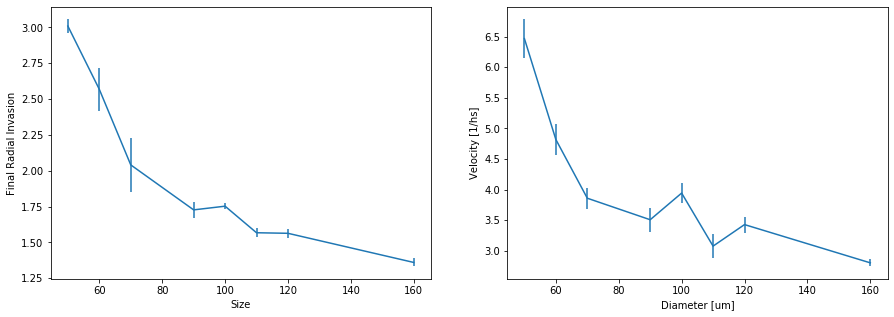

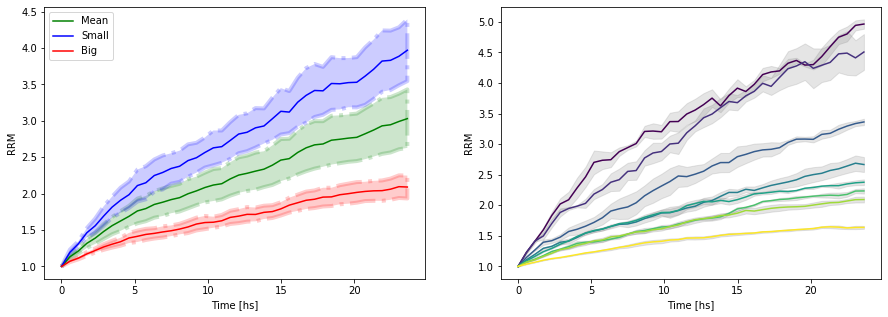

Results for configuration [5.00e+01 3.50e-02 1.75e-02 2.00e+01 4.00e-01 0.00e+00]


In [6]:
# Analysis

thresh_size = 100 #Threshhold size in um
ith = diam.index(thresh_size)

fol = str(dir_sim)
ff = []
for item in os.listdir(fol):   
    if not item.startswith('.'):
        ff.append(item)
ff.sort()

T = tunit*tt #Duration of the simulations in hours


#ff = ff[1:]
dirr = path(fol)
dir_an = dirr.joinpath('Analysis')
dir_an.mkdir(exist_ok = True)
folder = str(dir_an)

# Plots final radial invasion and velocity (slope after hs)
var = size_plot(ff, folder, fol, diam, cell, T, plot = True, hs=8)
# Plots mean, small and large spheres RRM and single spheres RRM
thresh(ff, fol, folder, ith, T, plot = True)
print('Results for configuration ' + str(var))


## Loop variables and sizes

In [11]:
## Range to explore response of variables 

#q, ix = np.linspace(0.1, 0.5, 5), 4
#c1, ix = np.linspace(0.005, 0.1, 10), 1
#d, ix = np.linspace(10, 50, 5), 0
cf, ix = np.linspace(10, 100, 10), 3
#c2, ix = np.linspace(0, 0.035, 5), 2


var = []
for variab in cf:
#    for variab2 in cf:
    var.append([50, 0.03, 0.03/2, variab, 0.4, 0]) 
var = np.asarray(var)

diam = [  50,  60,   70,  90,   100,   110,  120, 160] #DMSO


In [ ]:
##### DO NOT CHANGE. Running will overwrite files
for j, variables in enumerate(var):
    dir_save2 = dir_sim.joinpath('Var' + str(j+1))
    dir_save2.mkdir(exist_ok = True)
    
    for i, sizes in enumerate(diam):
        dir_save = dir_save2.joinpath('diam%03d' % diam[i])
        dir_save.mkdir(exist_ok = True)
        folder = str(dir_save) 
        n0, u0 = icn_squared(grid, diam[i], cell, u=0)
        filename, U_m, N_m, P_m = iterator_m(u0, n0, variables, dt, iterations, folder, name, cell, tt, save, progress, mec_stat, still, rnd)


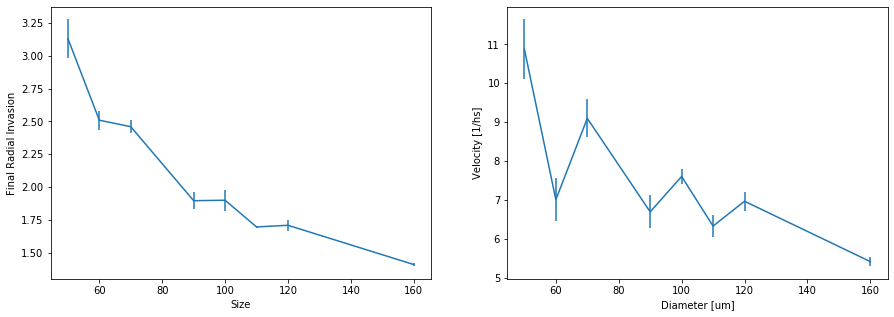

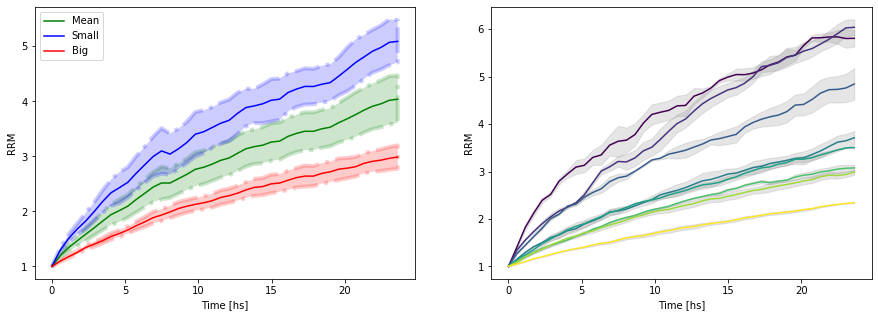

Results for configuration [5.e+01 1.e-02 5.e-03 5.e+00 0.e+00 0.e+00]


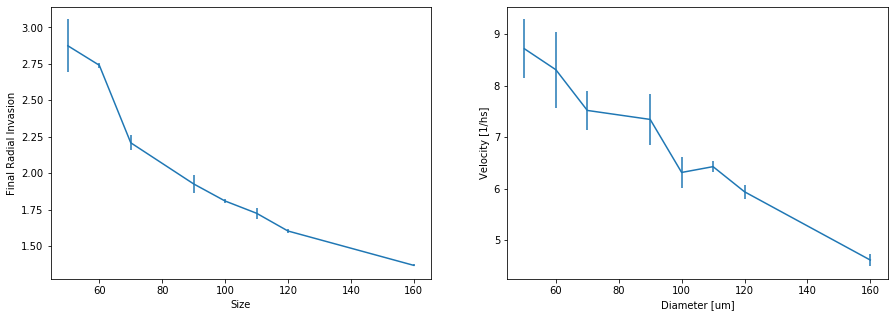

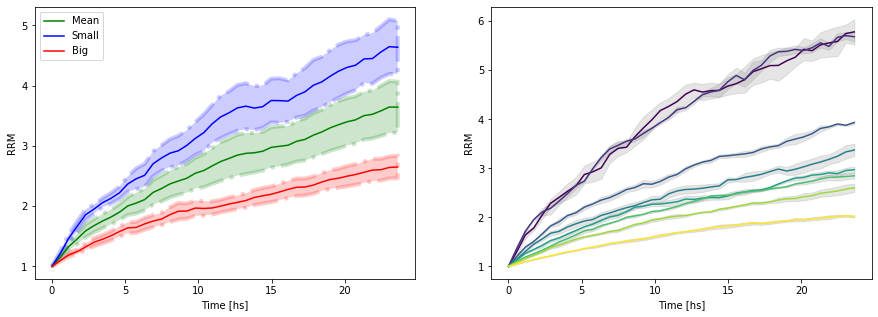

Results for configuration [5.e+01 1.e-02 5.e-03 1.e+02 0.e+00 0.e+00]


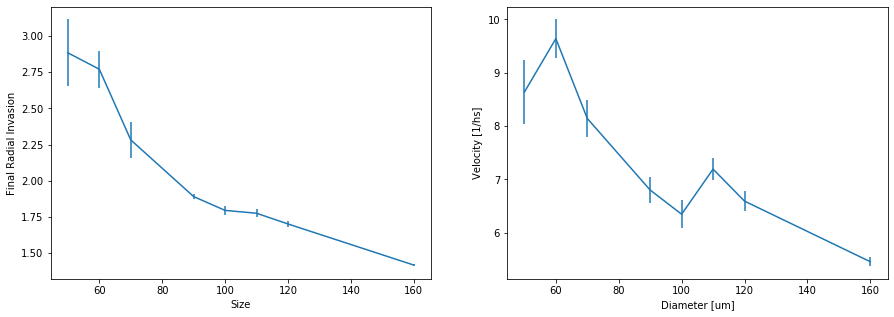

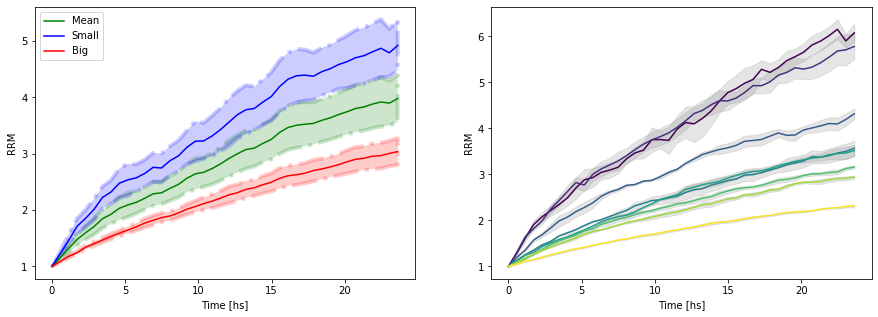

Results for configuration [5.00000000e+01 1.00000000e-02 5.00000000e-03 1.55555556e+01
 0.00000000e+00 0.00000000e+00]


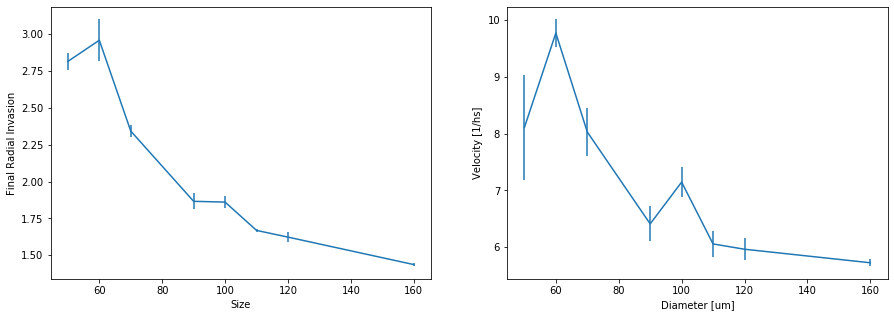

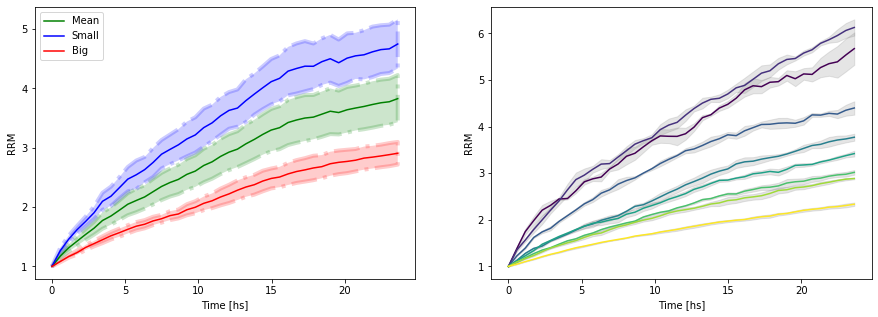

Results for configuration [5.00000000e+01 1.00000000e-02 5.00000000e-03 2.61111111e+01
 0.00000000e+00 0.00000000e+00]


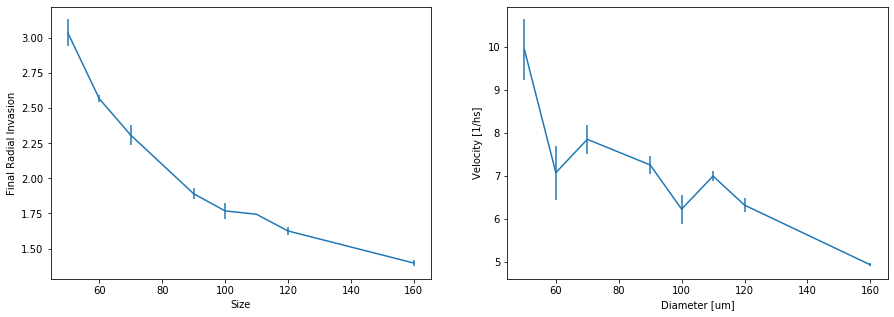

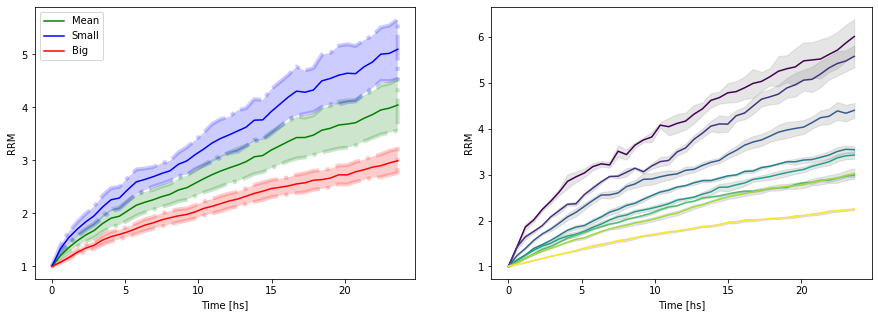

Results for configuration [5.00000000e+01 1.00000000e-02 5.00000000e-03 3.66666667e+01
 0.00000000e+00 0.00000000e+00]


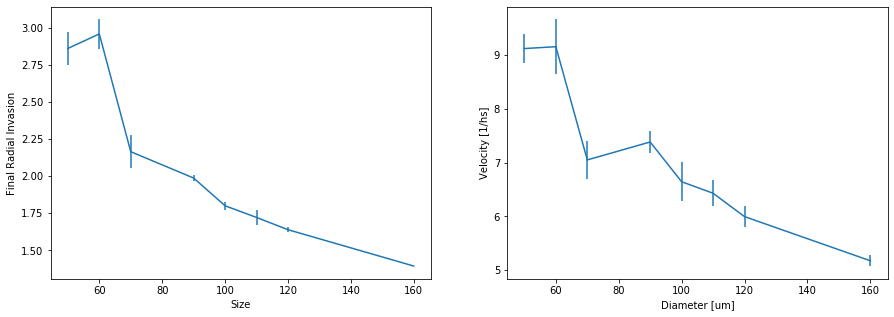

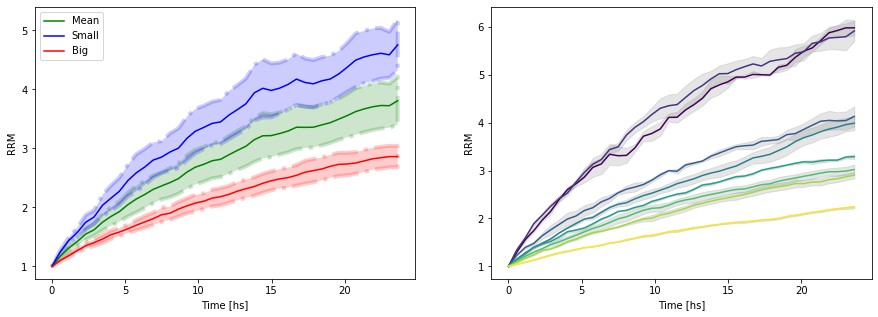

Results for configuration [5.00000000e+01 1.00000000e-02 5.00000000e-03 4.72222222e+01
 0.00000000e+00 0.00000000e+00]


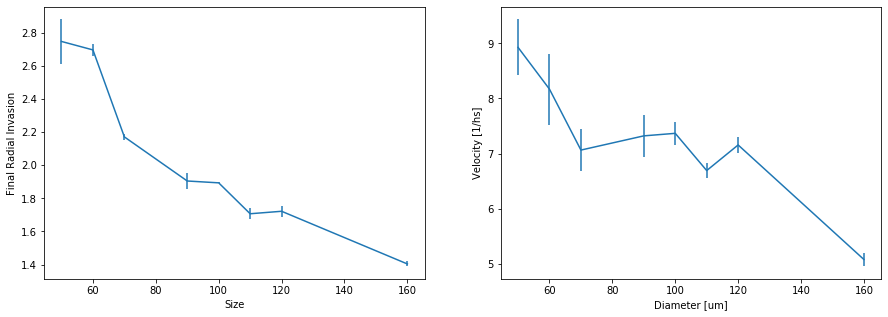

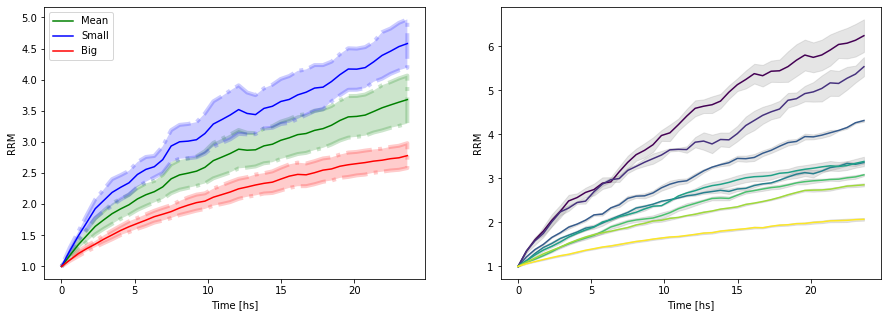

Results for configuration [5.00000000e+01 1.00000000e-02 5.00000000e-03 5.77777778e+01
 0.00000000e+00 0.00000000e+00]


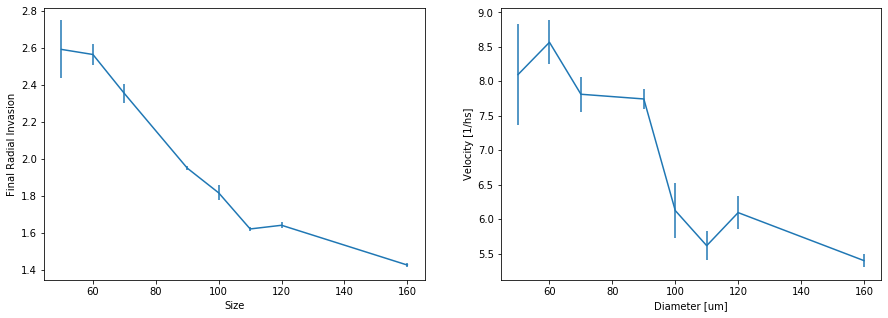

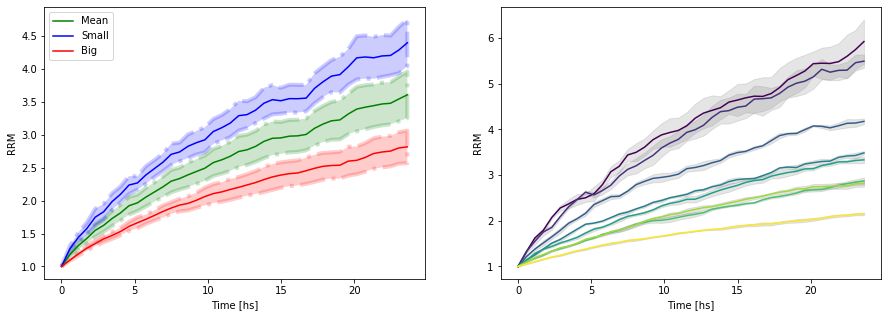

Results for configuration [5.00000000e+01 1.00000000e-02 5.00000000e-03 6.83333333e+01
 0.00000000e+00 0.00000000e+00]


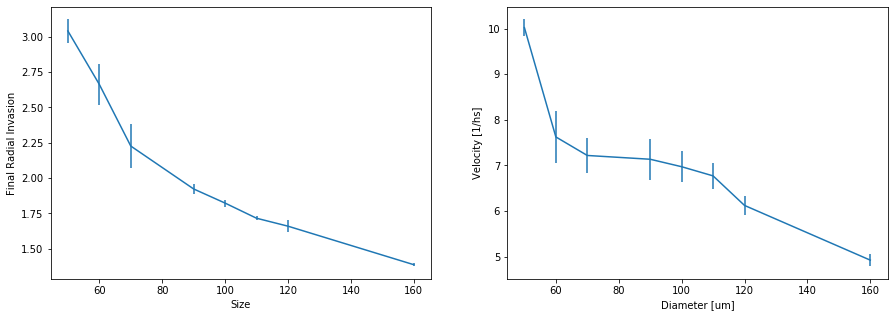

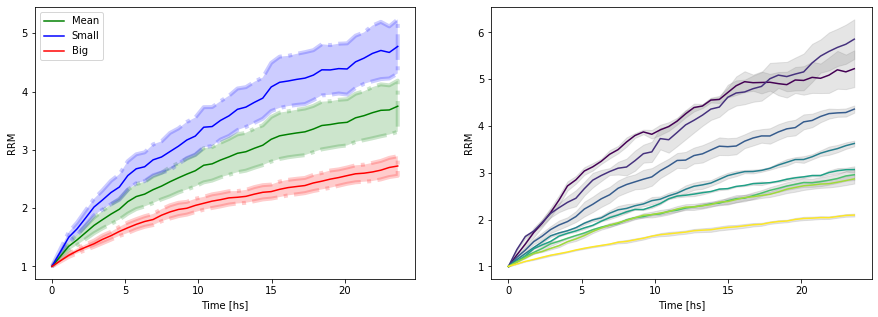

Results for configuration [5.00000000e+01 1.00000000e-02 5.00000000e-03 7.88888889e+01
 0.00000000e+00 0.00000000e+00]


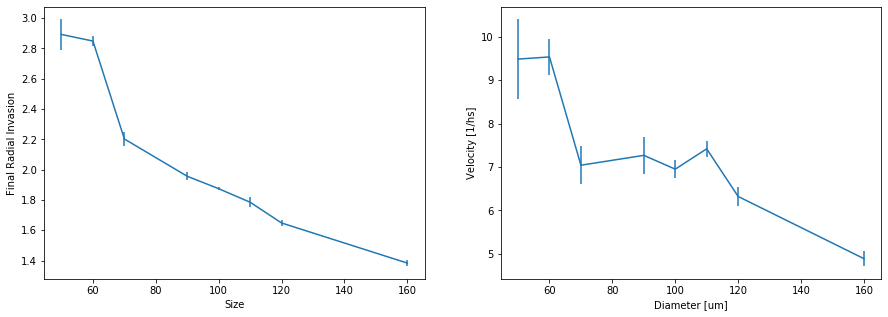

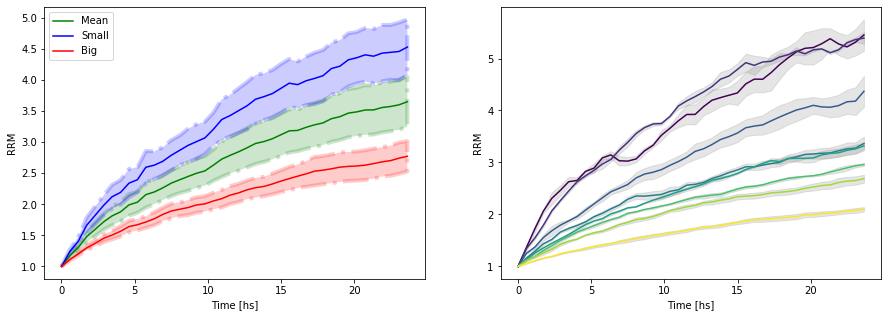

Results for configuration [5.00000000e+01 1.00000000e-02 5.00000000e-03 8.94444444e+01
 0.00000000e+00 0.00000000e+00]


In [12]:
# Analysis
thresh_size = 100
ith = diam.index(thresh_size)

fol = str(dir_sim)
vv = []
for item in os.listdir(fol):   
    if not item.startswith('.'):
        vv.append(item)
vv.sort()
T = tunit*tt #Duration of the simulations in hours

vari = []
for variables in vv:
    dirr = dir_sim.joinpath(variables)
    fol1 = str(dirr)
    ff = []
    for item in os.listdir(fol1):   
        if not item.startswith('.'):
            ff.append(item)
    ff.sort()
    ff = ff[1:]
    dir_an = dirr.joinpath('Analysis')
    dir_an.mkdir(exist_ok = True)
    folder = str(dir_an)
    
    
    # Plots final radial invasion and velocity (slope after hs)
    var = size_plot(ff, folder, fol1, diam, cell, T, plot = True, hs=5)
    vari.append(var[ix])
    # Plots mean, small and large spheres RRM and single spheres RRM
    thresh(ff, fol1, folder, ith, T, plot = True)
    print('Results for configuration ' + str(var))

## Range Analysis

In [13]:
#Folders:

fol = '/Users/cuenca/Documents/BsAs/SquaredLattice/NewSim/RangeCF' #Folder with explored range files
dirr = path(fol)
fol1 = dirr.joinpath(fol + '/Analysis')
fol4 = '/Users/cuenca/Documents/BsAs/SquaredLattice/NewSim/Rnd/Analysis' #Folder with random simulations
data_rnd = pd.read_csv(fol4 + '/rtime.csv')
v_rnd = pd.read_csv(fol4 + '/vfinal.csv')
v_rnd.sort_values(by='size')
fol3 = '/Users/cuenca/Documents/BsAs/SquaredLattice/TrackMate/TrackAnalysis/DMSO/Analisis' #Folder with tracking results
data_exp = pd.read_csv(fol3 + '/rtime.csv')
v_exp = pd.read_csv(fol3 + '/vfinal.csv')
v_exp.sort_values(by='size')

T = 24 ############# ojo, acá cambiar por 12 si es necesario!!!!!!!!!
ff = []
for item in os.listdir(fol):   
    if not item.startswith('.'):
        ff.append(item)
ff.sort()
fol1.mkdir(exist_ok = True)

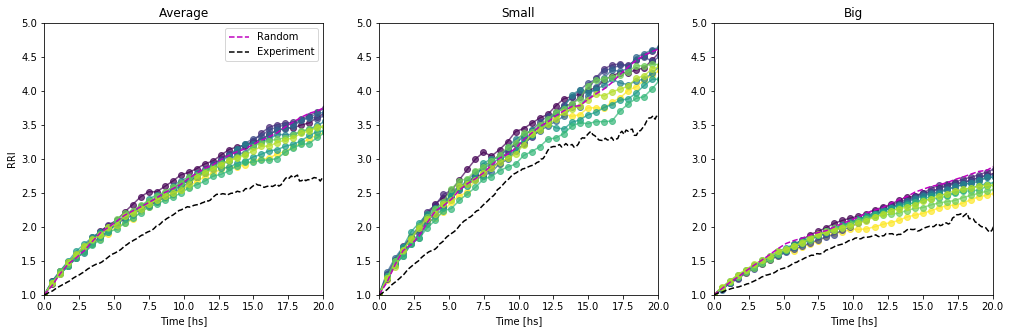

In [26]:
vari_ord = np.sort(vari)

plt.rcParams["figure.figsize"] = [17, 5]
color1 = pl.cm.viridis(np.linspace(0,1,len(ff)))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

for i, var in enumerate(ff):
    j = np.where(vari_ord == vari[i])[0][0]
    car = dirr.joinpath(var + '/Analysis')
    data = pd.read_csv(str(car) + '/rtime.csv')
    
    ax1.plot(data['time'].values, data['rmean'].values, marker = 'o', color = color1[j], alpha = 0.7)

    
    ax2.plot(data['time'].values, data['rsmall'].values, marker = 'o', color = color1[j], alpha = 0.7)
    
    
    ax3.plot(data['time'].values, data['rbig'].values, marker = 'o', color = color1[j], alpha = 0.7)

    
    
ax1.plot(data_rnd['time'].values, data_rnd['rmean'].values, '--', color = 'm', label = 'Random')

ax2.plot(data_rnd['time'].values, data_rnd['rsmall'].values,'--', color = 'm')

ax3.plot(data_rnd['time'].values, data_rnd['rbig'].values, '--', color = 'm')



ax1.plot(data_exp['time'].values, data_exp['rmean'].values, '--', color = 'k', label = 'Experiment')
ax1.title.set_text('Average')
ax1.set_ylabel('RRI')
ax1.set_xlim((0,20))
ax1.set_ylim((1, 5))
ax1.legend()
ax1.set_xlabel('Time [hs]')

ax2.plot(data_exp['time'].values, data_exp['rsmall'].values, '--', color = 'k')
ax2.title.set_text('Small')
ax2.set_xlim((0,20))
ax2.set_ylim((1, 5))
ax2.set_xlabel('Time [hs]')

ax3.plot(data_exp['time'].values, data_exp['rbig'].values, '--', color = 'k')
ax3.title.set_text('Big')
ax3.set_xlim((0,20))
ax3.set_ylim((1, 5))
ax3.set_xlabel('Time [hs]')
plt.savefig(str(fol1) + '/RangeR.svg', dpi = 100)
plt.show()